# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [ ]:
df # вывела таблицу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
df['is_apartment'].unique()  
# столб df['is_apartment'] подозрительный, так как могут содержаться только Nan-значеня поэтому я проверила на уникальные значения

array([nan, False, True], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Расшифровка столбов 
* total_images - число фотографий квартиры в объявлении 
* last_price -  цена на момент снятия с публикации
* total_area - общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition - дата публикации
* rooms - число комнат
* ceiling_height - высота потолков (м)
* floors_total -  всего этажей в доме
* living_area  - жилая площадь в квадратных метрах (м²)
* floor - этаж
* is_apartment - апартаменты (булев тип)
* studio - квартира-студия (булев тип)
* open_plan — свободная планировка (булев тип)
* kitchen_area - площадь кухни в квадратных метрах (м²)
* balcony — число балконов 
* locality_name - название населенного пункта 
* airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest - расстояние до центра города (м)
* parks_around3000 - число парков в радиусе 3 км
* parks_nearest - расстояние до ближайшего парка (м)
* ponds_around3000 - число водоёмов в радиусе 3 км
* ponds_nearest -  расстояние до ближайшего водоёма (м)
* days_exposition - сколько дней было размещено объявление (от публикации до снятия)

In [ ]:
df.isna().sum() # просмотрим сколько и где есть пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Результат предосмотра данных

1. Заменить название столбца 
* df['cityCenters_nearest'] на df['сity_centers_nearest']
* df['parks_around3000'] на df['parks_around_3000']
* df['ponds_around3000'] на df['ponds_around_3000']

2. Заменить Nan в столбах:
* df['ceiling_height']  
> Можно пропуски заменить на медианное значение, потому что медиана не сильно зависит от выбросов

* df['floors_total']      
> Можно заменить на 0

* df['living_area']    
> Можно пропуски заменить на медианное значение

* df['is_apartment']   
> Заменим пропуски 0

* df['parks_nearest']  
> Парки могут отстуствовать 
> Заменим пропуски на 0

* df['kitchen_area']   
> Можно пропуски заменить на медианное значение

* df['balcony ']
> Балконы могут отстуствовать 
> Заменим пропуски на 0 

* df['locality_name ']   
> В пропусках поставим ничего 

* df['airports_nearest'] 
> Заменим на 0 пропуски

* df['cityCenters_nearest'] 
> Медиану будет считать некорректно, потому что это место 
> Удалю пропуски

* df['parks_around3000']
> Парки могут отстуствовать 
> Заменим пропуски на 0 

* df['parks_nearest']
> Заменим пропуски на 0

* df['ponds_around3000']
> Водоемы могут отстуствовать 
> Заменим пропуски на 0 

* df['days_exposition']     
> Можно пропуски заменить на медианное значение
* df['ponds_nearest']
> Заменю пропуски на 0
3. Привести данные 
* df['first_day_exposition'] из  в datetime потому что странный перевод
* df['floors_total'] в int потому что не бывает дробных этажей
* df['balcony'] в int потому что количество балконов не может быть дробным числом
* df['is_apartment'] в bool потому что указано, что изначально это должно быть bool
* df['parks_around3000']  перевести в int
* df['ponds_around3000']  перевести в int
* df['days_exposition'] перевести в int
* df['last_price'] перевести в int 
* df['ceiling_height']  перевести в int для удобства 

# Предобработка данных

# Выполним замену названий столбцов

In [ ]:
df.rename(columns={'cityCenters_nearest': 'сity_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000':'ponds_around_3000'}, inplace=True)
df.info() #проверим, что все столбы, которые указаны переименовались

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Работа с пропусками

In [ ]:
for i in df.columns:
    if i in ['days_exposition','kitchen_area', 'living_area', 'ceiling_height']:
        df[i] = df[i].fillna(value=df[i].median()) # заменила на медианное значение 
    elif i in ['is_apartment', 'parks_nearest', 'balcony', 'airports_nearest', 'parks_around_3000', 
                  'parks_nearest ','ponds_around_3000', 'ponds_nearest','floors_total']:
        df[i] = df[i].fillna(value=0) # заменила на 0

In [ ]:
df.loc[df['floors_total'].isnull(), 'floors_total'] = df['floor']

In [ ]:
df.loc[df['living_area'].isnull(), 'living_area'] = df['living_area']/df['total_area']

In [ ]:
df.loc[df['kitchen_area'].isnull(), 'kitchen_area'] = df['kitchen_area']/df['total_area']

In [ ]:
df.isna().sum()  # проверила пропуски

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
сity_centers_nearest    5519
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition            0
dtype: int64

# Изменение типа данных 

In [ ]:
for i in df.columns:
    if i in ['living_area','floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000','days_exposition', 'last_price']:
        df[i] = df[i].astype('int')
    elif i in ['is_apartment']:
        df[i] = df[i].astype('bool')
    elif i in ['first_day_exposition']:
        df[i] = pd.to_datetime(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  int64         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [ ]:
df['first_day_exposition'] # просмотрю как вывелся столбец с датой   

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

# Изучаем уникальные значения и удаляем дубликаты 

In [ ]:
df.shape #вывела таблицу целиком 

(23699, 22)

In [ ]:
df['locality_name'] 

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [ ]:
df['locality_name'].unique() # данный столбец просмотрела на уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
df['locality_name'] = df['locality_name'].where(~df['locality_name'].isnull() & ~df['locality_name'].isnull(), 'Санкт-Петербург')

In [ ]:
#привожу данные в столбе к нормальным, исходя из задания
df['locality_name'] = df['locality_name'] .str.lower()
df['locality_name'] = df['locality_name'] .str.strip()
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('ё','е'))
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('поселок',''))
df['locality_name'].unique()

array(['санкт-петербург', ' шушары', 'городской  янино-1', ' парголово',
       ' мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       ' городского типа красный бор', 'гатчина', 'деревня федоровское',
       'выборг', 'кронштадт', 'кировск', 'деревня новое девяткино',
       ' металлострой', ' городского типа лебяжье',
       ' городского типа сиверский', ' молодцово',
       ' городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', ' аннино',
       ' городского типа ефимовский', ' плодовое', 'деревня заклинье',
       ' торковичи', ' первомайское', 'красное село', ' понтонный',
       'сясьстрой', 'деревня старая', 'деревня лесколово', ' новый свет',
       'сланцы', 'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', 'дере

# Найдем редкие и выбивабщиеся значения

In [ ]:
df.info()   #смотрю, что есть в таблице, чтобы обработать столбы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  int64         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

# Цена

In [ ]:
df['last_price'].describe() # перевожу в миллионы цену 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
#Изменим большие цифры в last_price на миллионы
df['last_price'] = df['last_price']/1000000

In [ ]:
df['last_price'].describe() 

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

<AxesSubplot:>

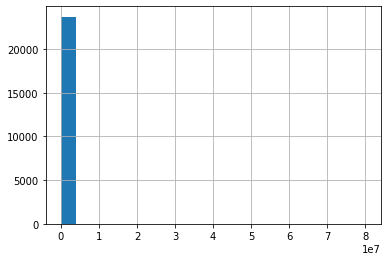

In [ ]:
df['last_price'].hist(range=(0,80000000),bins = 20)

In [ ]:
df = df.query('last_price > 0 and last_price <=6.8').reset_index(drop=True)

In [ ]:
df.shape

(17883, 22)

 Анализ 'last_price'
* Средняя цена 6.541549 млн
* Медианная цена 4.65 млн
* Минимальная цена 12190 тыся рублей 
* Максимальная цена 7,63 млн 
* Перезаписала столбец и убрала аномалии 
Большее число квартир продается от 3 до 4 млн 

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

А как ты определила границу, где начинаются аномалии? </div>

<p>
<div class="alert-info">
    Я смотрела по ящикам с усами
   </div>

# Комнаты

In [ ]:
df['rooms'].describe()

count    17883.000000
mean         1.783649
std          0.847767
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

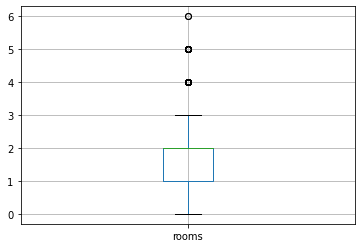

In [ ]:
df.boxplot('rooms')

<AxesSubplot:>

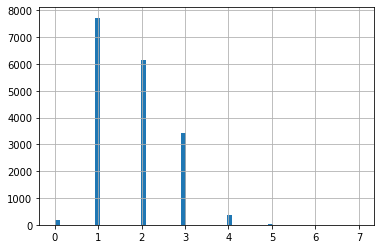

In [ ]:
df['rooms'].hist(range=(0,7),bins=60)

In [ ]:
df = df.query('rooms > 0 and rooms <=6').reset_index(drop=True)

In [ ]:
df.shape

(17691, 22)

 Анализ 'rooms'
* Среднее число комнат 2
* Медианное число комнат 2
* Минимальное число комнат 0, это может быть студия
* Максимальное число комнат 6
* Перезаписала столбец и убрала аномалии 
* Большее число квартир продается от 1-2 комнат

# Высота потолков

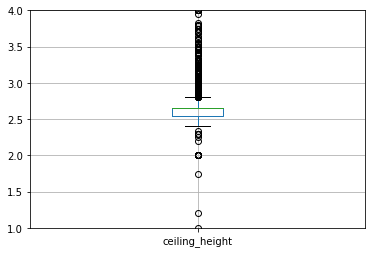

In [ ]:
plt.ylim(1, 4)
df.boxplot('ceiling_height')
plt.show()

In [ ]:
df['ceiling_height'].describe()

count    17691.000000
mean         2.670449
std          0.763330
min          1.000000
25%          2.550000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

In [ ]:
def change_parametr(a):
    if a > 10:
        return a/10
    return a
    
df['ceiling_height'] = df['ceiling_height'].apply(change_parametr)
df['ceiling_height'].unique()

array([2.65, 2.5 , 2.67, 2.56, 3.05, 2.7 , 2.75, 2.6 , 2.9 , 2.55, 2.8 ,
       3.  , 2.61, 3.25, 3.45, 2.57, 2.73, 2.34, 2.77, 3.4 , 3.2 , 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 2.52, 3.5 , 3.1 , 2.64, 2.66, 2.59,
       2.  , 2.85, 2.45, 3.15, 2.53, 2.74, 5.  , 2.79, 2.95, 4.06, 3.7 ,
       2.83, 2.4 , 3.3 , 3.65, 2.71, 2.3 , 2.48, 2.84, 2.62, 2.82, 2.63,
       3.83, 2.88, 3.55, 4.19, 4.  , 4.5 , 3.12, 3.75, 3.07, 8.  , 3.16,
       3.6 , 3.8 , 2.68, 3.33, 2.81, 3.32, 1.2 , 3.18, 8.3 , 3.01, 2.93,
       2.92, 3.08, 4.2 , 3.17, 3.04, 3.47, 3.21, 2.96, 2.87, 2.69, 3.03,
       5.3 , 2.2 , 3.54, 2.86, 3.35, 3.42, 2.99, 2.46, 1.4 , 3.95, 3.02,
       3.22, 2.94, 3.78, 1.75, 3.38, 2.25, 3.28, 2.26, 2.89, 3.27, 2.49,
       1.03, 2.47, 1.  , 3.49, 3.59, 2.91])

<AxesSubplot:>

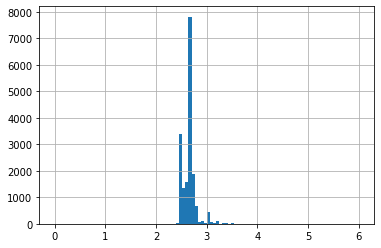

In [ ]:
df['ceiling_height'].hist(range=(0,6),bins = 100 )

In [ ]:
df = df.query('ceiling_height >= 2.6 and ceiling_height < 3.2').reset_index(drop=True) 

In [ ]:
df['ceiling_height'].unique()

array([2.65, 2.67, 3.05, 2.7 , 2.75, 2.6 , 2.9 , 2.8 , 3.  , 2.61, 2.73,
       2.77, 2.72, 2.78, 2.76, 3.1 , 2.64, 2.66, 2.85, 3.15, 2.74, 2.79,
       2.95, 2.83, 2.71, 2.84, 2.62, 2.82, 2.63, 2.88, 3.12, 3.07, 3.16,
       2.68, 2.81, 3.18, 3.01, 2.93, 2.92, 3.08, 3.17, 3.04, 2.96, 2.87,
       2.69, 3.03, 2.86, 2.99, 3.02, 2.94, 2.89, 2.91])

In [ ]:
df.shape

(12602, 22)

Анализ 'ceiling_height'
* Средняя высота потолков 2.72 м
* Медианное значение 2.65 м
* Минимальное  1 м
* Максимальное 32 м 
* Заметила, что высота не может быть больше 10 м, поделила значение потолка на 10, возможно это просто ошибки 
* Перезаписала столбец и убрала аномалии 
* Большее число квартир продается с потолками 2,60 м 

# Количество этажей

In [ ]:
df['floors_total'].describe()

count    12602.000000
mean        11.522139
std          7.024441
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

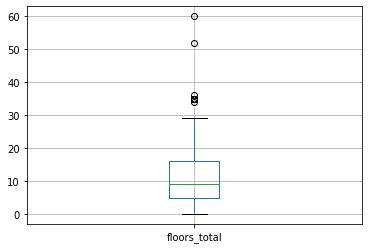

In [ ]:
df.boxplot('floors_total')

In [ ]:
df= df.query('floors_total > 0 and floors_total < 30 ').reset_index(drop=True) 

In [ ]:
df.shape

(12529, 22)

Анализ  'floors_total'
* Среднее количество этажей - 11
* Медианное значение этажей - 10 м
* Минимальное значение 0
* Максимальное 60 этажей 
* Перезаписала столбец и убрала аномалии 

# Жилая площадь

In [ ]:
df['living_area'].describe()

count    12529.000000
mean        27.168090
std         10.775731
min          2.000000
25%         18.000000
50%         28.000000
75%         32.000000
max        100.000000
Name: living_area, dtype: float64

<AxesSubplot:>

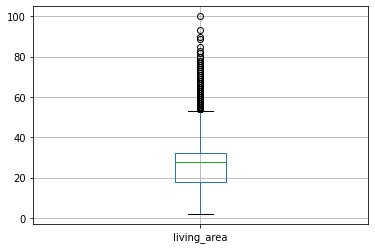

In [ ]:
df.boxplot('living_area')

<AxesSubplot:>

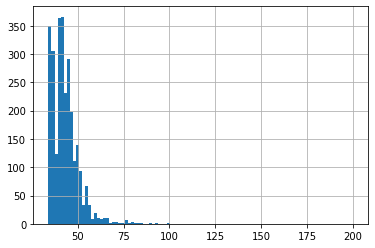

In [ ]:
df['living_area'].hist(range=(34, 200), bins= 100)

In [ ]:
df = df.query('living_area > 2 and living_area < 100').reset_index(drop=True)

In [ ]:
df.shape

(12527, 22)

Анализ 'living_area'
* Среднее значение метража квартиры 28
* Медианное значение метража квартиры 30
* Максимальное значение метража квартиры 100
* Перезаписала столбец и убрала аномалии
Больше всего продается квартир от 0 до 50 квадратных метров 

# Общая площадь

count    12527.000000
mean        48.768289
std         14.872046
min         13.000000
25%         37.600000
50%         45.000000
75%         57.800000
max        190.000000
Name: total_area, dtype: float64

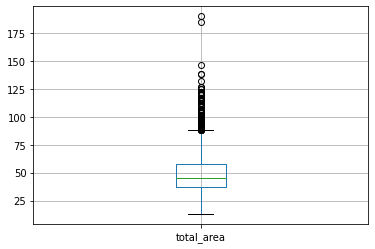

In [ ]:
df.boxplot('total_area')
df['total_area'].describe()

In [ ]:
df = df.query('total_area > 12 and total_area <100' ).reset_index(drop=True)

In [ ]:
df.shape

(12479, 22)

Анализ 'total_area'
* Среднее значение общего метража квартиры  54 кв м 
* Медианное значение общего метража квартиры 51 кв м 
* Максимальное значение общего метража квартиры 190 кв м 
* Перезаписала столбец и убрала аномалии 

# Этаж

count    12479.000000
mean         6.286161
std          5.212530
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         27.000000
Name: floor, dtype: float64

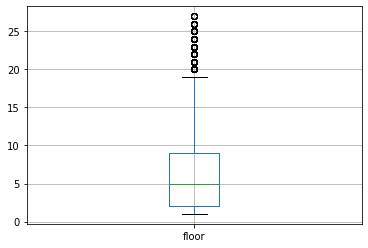

In [ ]:
df.boxplot('floor')
df['floor'].describe()

In [ ]:
df['floor'] = df.query('floor > 0 and floor < 20').reset_index(drop=True)

In [ ]:
df.shape

(12479, 22)

Анализ 'floor'
* Среднее значение этажа 4
* Медианное значение этажа 4 
* Максимальное значение этажа 15
* Перезаписала столбец и убрала аномалии 

# Метраж кухни

count    12479.000000
mean         9.407775
std          3.014372
min          1.300000
25%          7.500000
50%          9.100000
75%         10.685000
max         50.000000
Name: kitchen_area, dtype: float64

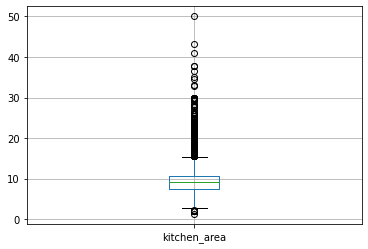

In [ ]:
df.boxplot('kitchen_area')
df['kitchen_area'].describe()

<AxesSubplot:>

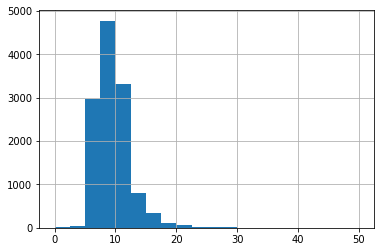

In [ ]:
df['kitchen_area'].hist(range=(0, 50), bins= 20)

In [ ]:
df = df.query('kitchen_area > 2 and  kitchen_area < 30').reset_index(drop=True)

In [ ]:
df.shape

(12456, 22)

Анализ 'kitchen_area'
* Средняя площадь кухни - 9,1 кв м 
* Медианное значение площадь кухни - 8,5
* Максимальное значение площадь кухни - 53
* Перезаписала столбец и убрала аномалии 

# Близость к аэропорту

count    12456.000000
mean     19805.993818
std      17216.141908
min          0.000000
25%          0.000000
50%      18423.500000
75%      33623.000000
max      78527.000000
Name: airports_nearest, dtype: float64

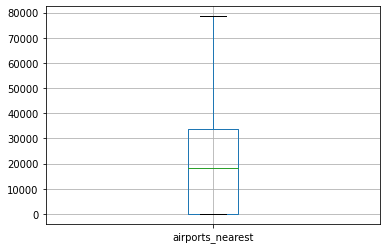

In [ ]:
df.boxplot('airports_nearest')
df['airports_nearest'].describe()

In [ ]:
df= df.query('airports_nearest >= 0 and airports_nearest < 35000').reset_index(drop=True)

In [ ]:
df.shape

(9655, 22)

Анализ 'airports_nearest'
* Среднее расстояние до аэропорта  20767 м 
* Медианное расстояние до аэропорта 20192 м
* Минимальное расстояние до аэропорта  0 м
* Максимальное 84869 м 
* Перезаписала столбец и убрала аномалии

# Близость к центру

count     5735.000000
mean     15011.232258
std       7176.096212
min        467.000000
25%      11370.000000
50%      13838.000000
75%      17102.000000
max      37477.000000
Name: сity_centers_nearest, dtype: float64

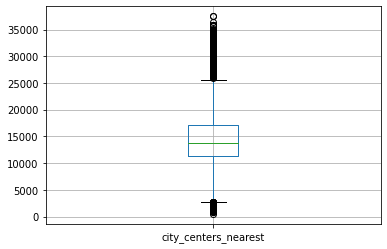

In [ ]:
df.boxplot('сity_centers_nearest')
df['сity_centers_nearest'].describe()

<AxesSubplot:>

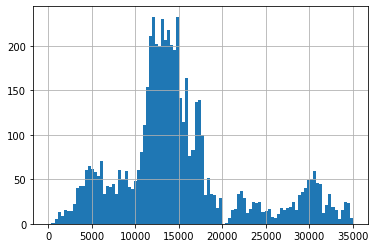

In [ ]:
df['сity_centers_nearest'].hist(range=(0,35000), bins= 100)

In [ ]:
df = df.query('сity_centers_nearest <30000').reset_index(drop=True)

In [ ]:
df.shape

(5335, 22)

Анализ 'сity_centers_nearest'
* Среднее расстояние до центра 15161 м 
* Медианное расстояние до центра 13335 м
* Минимальное расстояние до центра 467 м
* Максимальное 37477 м 
* Перезаписала столбец и убрала аномалии

# Количество парков в районе 3 км

count    5335.000000
mean        0.492034
std         0.715857
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: parks_around_3000, dtype: float64

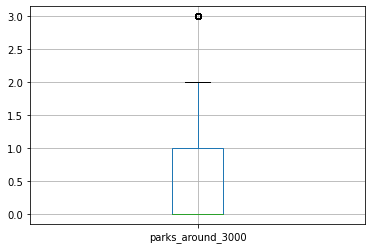

In [ ]:
df.boxplot('parks_around_3000')
df['parks_around_3000'].describe()

In [ ]:
df=df.query('сity_centers_nearest !=3').reset_index(drop=True)

In [ ]:
df.shape

(5335, 22)

Анализ 'parks_around_3000'
* Среднее количество парков 0
* Медианное количество парков 0
* Минимальное количество парков 0
* Максимальное количество парков 3 

# Расстояние до парков

count    5335.000000
mean      191.341143
std       319.675724
min         0.000000
25%         0.000000
50%         0.000000
75%       366.000000
max      3190.000000
Name: parks_nearest, dtype: float64

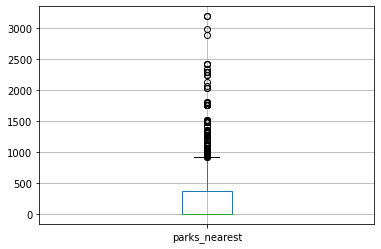

In [ ]:
df.boxplot('parks_nearest')
df['parks_nearest'].describe()

<AxesSubplot:>

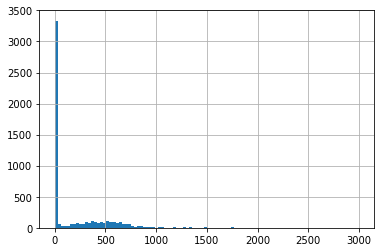

In [ ]:
df['parks_nearest'].hist(range=(0,3000), bins= 100)

In [ ]:
df = df.query('parks_nearest < 1000').reset_index(drop=True)

In [ ]:
df.shape

(5234, 22)

Анализ 'parks_around_3000'
* Среднее расстояние до ближайшего парка 258 м 
* Медианное расстояние до ближайшего парка 51 м 
* Минимальное расстояние до ближайшего парка  0 м 
* Максимальное расстояние до ближайшего парка  3190
* Перезаписала столбец, убрав аномалии

# Количество прудов в 3 км 

count    5234.000000
mean        0.668705
std         0.798615
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: ponds_around_3000, dtype: float64

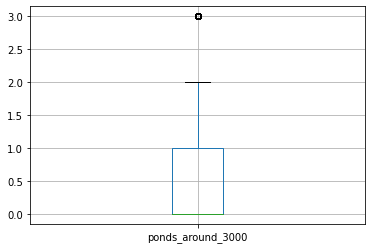

In [ ]:
df.boxplot('ponds_around_3000')
df['ponds_around_3000'].describe()

In [ ]:
#df = df.query('ponds_around_3000 !=3').reset_index(drop=True)

In [ ]:
#df.shape

Анализ 'ponds_around_3000'
* Среднее количество озер 0 
* Медианное количество озер 1  
* Минимальное количество озер 0 
* Максимальное количество озер 3 
* Перезаписала столбец, убрав аномалии


# Пруды рядом 

count    5234.000000
mean      262.679595
std       329.340900
min         0.000000
25%         0.000000
50%         0.000000
75%       522.000000
max      1299.000000
Name: ponds_nearest, dtype: float64

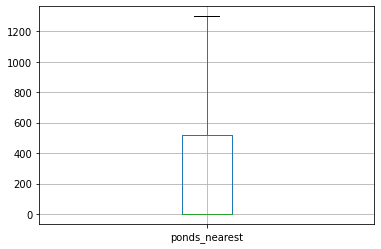

In [ ]:
df.boxplot('ponds_nearest')
df['ponds_nearest'].describe()


* Cреднее  275.286735
* Медианное 83
* Максимальное 1299

# Количество дней

count    5234.000000
mean      162.760413
std       203.038303
min         2.000000
25%        43.000000
50%        95.000000
75%       194.750000
max      1477.000000
Name: days_exposition, dtype: float64

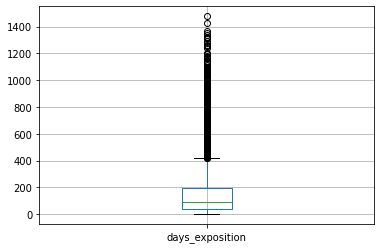

In [ ]:
df.boxplot('days_exposition')
df['days_exposition'].describe()

<AxesSubplot:>

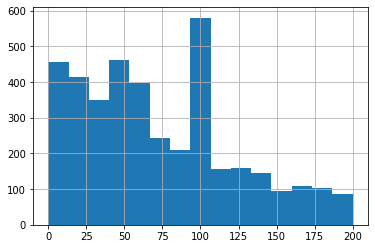

In [ ]:
df['days_exposition'].hist(range=(0,200),bins = 15)

In [ ]:
df = df.query('days_exposition < 200').reset_index(drop=True)

In [ ]:
df.shape

(3960, 22)

Анализ 'days_exposition'
* Среднее количесво дней 167
* Медианное количесво дней 95 м 
* Минимальное количесво дней 1 м 
* Максимальное количесво дней  1458 - необычайно долгая продажа квартиры
* Перезаписала столбец, убрав аномалии
* Быстрые продажи длятся 45 дней
Больше всего продаж на 95 день

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
df['square_meter_price'] = (df['last_price'] / df['total_area'])*100000 

In [ ]:
df['published_day'] = df['first_day_exposition'].dt.weekday
df['published_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['published_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [ ]:
def floor_group(a):
    number_floor=a['floor']
    total_floor=a['floors_total']
    if number_floor==1:
        return 'первый'
    if number_floor==total_floor:
        return 'последний'
    return 'другой'

In [ ]:
floor_position=df.apply(floor_group,axis=1)

In [ ]:
df['type_of_floor']=floor_position

In [ ]:
df.columns #проверяем, добавились ли столбы

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'сity_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'square_meter_price',
       'published_day', 'published_month', 'published_year', 'type_of_floor'],
      dtype='object')

In [ ]:
df['сity_centers_nearest'] = (df['сity_centers_nearest']/1000)
df['сity_centers_nearest'].head(100) # из м в км 

0     18.603
1     14.259
2     12.209
3     11.603
4     12.872
       ...  
95     9.241
96    19.694
97    28.339
98     4.465
99    11.639
Name: сity_centers_nearest, Length: 100, dtype: float64

Мной были добавлены новые столбцы 
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах

# Анализ факторов влияющих на стоимость объекта 

In [ ]:
df['last_price'].corr(df['total_area'])

0.6550890336165468

Text(0.5, 1.0, 'Влияние размера квартиры на цену')

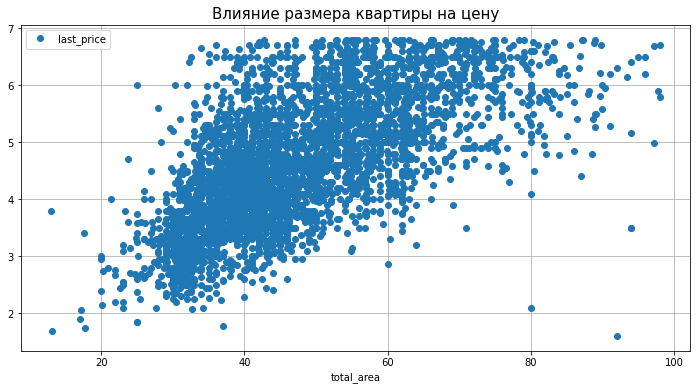

In [ ]:
df.plot(x='total_area',y='last_price',grid=True, style='o',figsize=(12,6))
plt.title('Влияние размера квартиры на цену', fontsize=15)

Чем больше площадь, тем больше и цена. Корреляция положительна, и стоимость от площади -> очень зависит

In [ ]:
df['last_price'].corr(df['living_area'])

0.5063065498380148

Text(0.5, 1.0, 'Влияние жилой площади на цену')

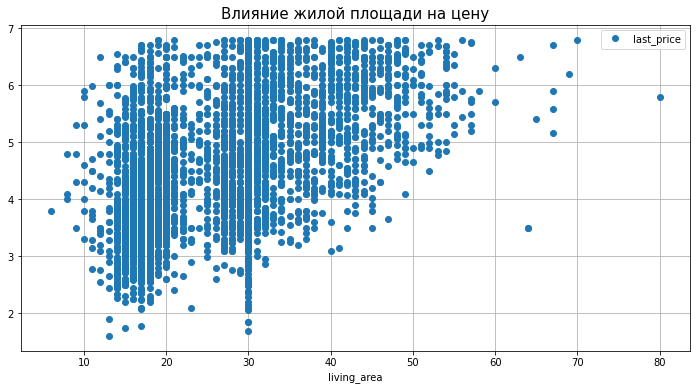

In [ ]:
df.plot(x='living_area',y='last_price',grid=True, style='o',figsize=(12,6))
plt.title('Влияние жилой площади на цену', fontsize=15)

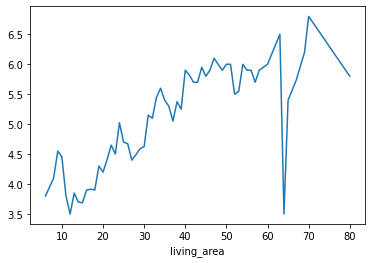

In [ ]:
df.groupby('living_area')['last_price'].median()\
    .plot();

Чем больше площадь, тем больше и цена. Корреляция положительна, и стоимость от площади -> очень зависит

In [ ]:
df['last_price'].corr(df['kitchen_area'])

0.29030258701400086

In [ ]:
#df.plot(x='kitchen_area',y='last_price',grid=True, style='o',figsize=(12,6))
#plt.title('Влияние метража кухни на цену', fontsize=15)

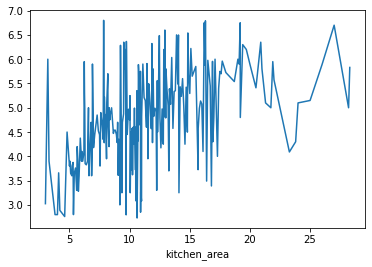

In [ ]:
df.groupby('kitchen_area')['last_price'].median()\
    .plot();

Чем больше метраж кухни, тем больше стоимость

In [ ]:
df['last_price'].corr(df["rooms"])

0.45094643456155203

In [ ]:
rooms_dependency = df.pivot_table(index='rooms', values='last_price', aggfunc=['sum','mean'])
rooms_dependency.columns = ['sum_last_price', 'mean']

По графику можно увидеть, что цена увиличивается с увеличением количества комнат

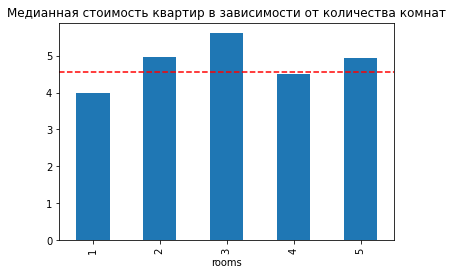

In [ ]:
df.query('rooms < 6').groupby('rooms')['last_price'].median()\
    .plot(kind = 'bar', title = 'Медианная стоимость квартир в зависимости от количества комнат')\
    .axhline(y = df.query('rooms < 6')['last_price'].median(), color = 'r', linestyle = 'dashed')
plt.show()

In [ ]:
floor_price = df.pivot_table(index='type_of_floor', values='last_price', aggfunc=['sum','mean'])
floor_price.columns = ['sum_last_price', 'mean']

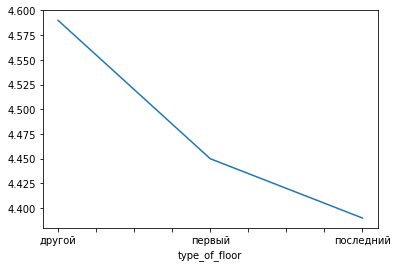

In [ ]:
df.groupby('type_of_floor')['last_price'].median()\
    .plot();

Цена на "другом" этаже выше, чем на "первом" или "последнем" 

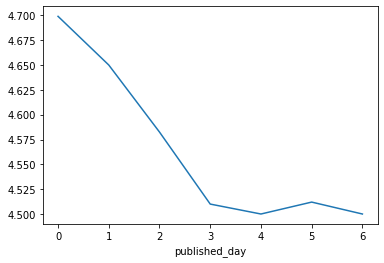

In [ ]:
df.groupby('published_day')['last_price'].median()\
    .plot();

Цена падает к выходным

In [ ]:
month_price = df.pivot_table(index='published_month', values='last_price', aggfunc=['sum', 'mean'])
month_price.columns = ['sum_last_price', 'mean']

<AxesSubplot:title={'center':'Влияниe месяца на цену квартиры'}, xlabel='published_month', ylabel='mean'>

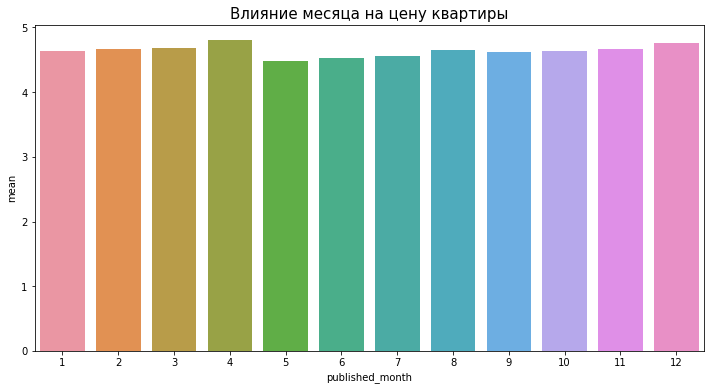

In [ ]:
month_price = df.pivot_table(index='published_month', values='last_price', aggfunc=['sum', 'mean'])
month_price.columns = ['last_price', 'mean']
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Влияниe месяца на цену квартиры', fontsize=15)
sns.barplot(x=month_price.index,y=month_price['mean'])

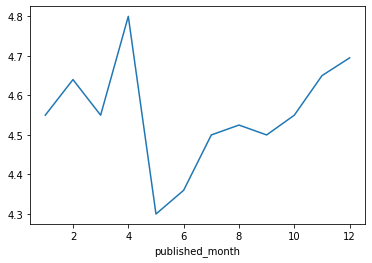

In [ ]:
df.groupby('published_month')['last_price'].median()\
    .plot();

В апреле цена выше, чем в другие месяцы

In [ ]:
year_price = df.pivot_table(index='published_month', values='last_price', aggfunc=['sum', 'mean'])
year_price.columns = ['sum_last_price', 'mean']

<AxesSubplot:title={'center':'Влияниe года на цену квартиры'}, xlabel='published_year', ylabel='mean'>

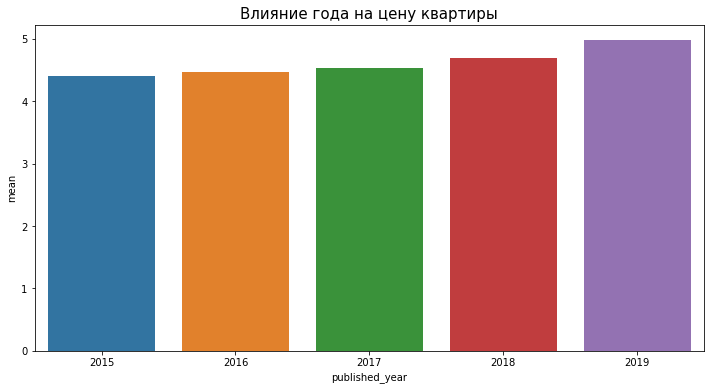

In [ ]:
year_price = df.pivot_table(index='published_year', values='last_price', aggfunc=['sum', 'mean'])
year_price.columns = ['last_price', 'mean']
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Влияниe года на цену квартиры', fontsize=15)
sns.barplot(x=year_price.index,y=year_price['mean'])

с 2014 - 2015 стоимость росла, 2015 - была максимальной, затем можно увидеть волнообразные скачки 

Наибольшее количество объявлений в Санкт-Петербурге
Наименьшее в Петергофе, Усть-Ижоре, Александровская

In [ ]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc=['count', 'mean'])\
    .sort_values(by = ('count', 'square_meter_price'), ascending = False)\
    .head(10)\
    .sort_values(by = ('mean', 'square_meter_price'), ascending = False)

,count,mean
,square_meter_price,square_meter_price
locality_name,,
Санкт-Петербург,15721,114849.008794
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,307,68746.146763


In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'сity_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'square_meter_price',
       'published_day', 'published_month', 'published_year', 'type_of_floor'],
      dtype='object')

In [ ]:
df['сity_centers_nearest'].astype(int)

0       18
1       14
2       12
3       11
4       12
        ..
3955    11
3956     9
3957    11
3958    16
3959     6
Name: сity_centers_nearest, Length: 3960, dtype: int64

In [ ]:
df['km_price'] = df['last_price']/df['сity_centers_nearest']

In [ ]:
spb = df.query('locality_name == "санкт-петербург"')
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,published_day,published_month,published_year,type_of_floor,km_price
1,16,4.65,39.0,2017-11-18,1,2.65,14,20,11.0,False,...,590.0,1,296.0,19,11923.076923,5,11,2017,другой,0.326110
2,15,5.20,54.4,2018-11-29,2,2.75,9,29,13.0,False,...,0.0,1,1175.0,29,9558.823529,3,11,2018,другой,0.425915
3,13,5.35,40.0,2018-11-18,1,2.65,22,30,17.0,False,...,620.0,1,1152.0,95,13375.000000,6,11,2018,другой,0.461088
4,17,5.20,50.6,2018-12-02,2,2.65,9,30,17.0,False,...,0.0,0,0.0,95,10276.679842,6,12,2018,другой,0.403978
5,17,6.60,52.1,2019-01-31,2,2.60,24,29,10.0,False,...,0.0,0,0.0,95,12667.946257,3,1,2019,другой,0.519603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,9,3.10,23.0,2018-03-19,1,2.80,9,12,NaN,False,...,262.0,1,442.0,41,13478.260870,0,3,2018,другой,0.260921
3956,10,5.95,56.0,2019-03-05,3,2.65,8,32,NaN,False,...,0.0,2,303.0,95,10625.000000,1,3,2019,другой,0.645546
3957,19,3.55,36.4,2016-06-08,1,2.65,16,14,NaN,False,...,701.0,0,0.0,70,9752.747253,2,6,2016,другой,0.298721
3958,13,3.55,35.3,2018-02-28,1,2.86,15,16,NaN,False,...,353.0,2,652.0,29,10056.657224,2,2,2018,другой,0.220757


In [ ]:
spb = spb.pivot_table(index='сity_centers_nearest', values='km_price', aggfunc='mean')
spb

,km_price
сity_centers_nearest,
0.769,4.551365
0.853,4.689332
0.959,6.465068
1.015,5.566502
1.097,5.834093
...,...
26.286,0.098912
27.431,0.082024
28.015,0.224880


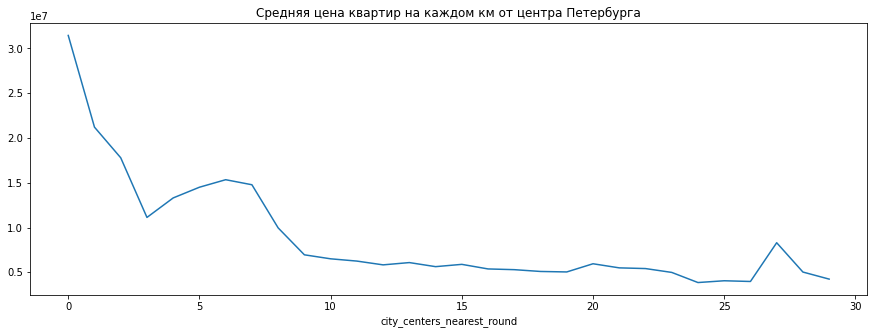

In [ ]:
data['сity_centers_nearest_round'] = np.round(data['cityCenters_nearest'] /1000, 0) #Здесь нам нужно округлять км до целого

data_spb = data[data['locality_name'] == 'Санкт-Петербург']

data_spb.groupby('сity_centers_nearest_round')['last_price'].mean()\
    .plot(figsize = (15,5), title = 'Средняя цена квартир на каждом км от центра Петербурга');

Чем дальше от центра, тем ниже цена 

### Общий вывод

В моем распоряжение были данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Моя задача была — выполнить предобработку данных и изучить их, в результате было обнаружено:
* Площадь влияет на стоимость, чем больше площадь, тем больше и стоимость
*  Чем больше комнат, тем больше стоимость, однако это считается при количестве комнат = 3, далее цена падает
*  Чем больше расстояние до центра, тем ниже цена 
*  Стоимость "другого" этажа выше, чем стоимость "первого" или "последнего"
*  Дата продажи: самая высокая стоимость в 2015 году, затем волнообразное колебание цены
*  Стоимость квартир падает к выходным 
*  Стоимость квартир в апреле выше, чем в другие месяцы 
*  Наибольшее количество объявлений в Санкт-Петербурге
*  Наименьшее в Петергофе, Усть-Ижоре, Александровская
*  Большее число продаж приходится на 95 день
*  Самые быстрые продажи за 1 день
